In [ ]:
from google.colab import drive 
drive.mount('drive')

Mounted at drive


In [ ]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

In [ ]:
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(0.5,0.5)])

In [ ]:
from torchvision import datasets

data_path = '/content/drive/MyDrive/Datasets '
train_dataset = datasets.FashionMNIST(data_path , download = False,train = True,transform = transform)
test_dataset = datasets.FashionMNIST(data_path , download = False, train = False,transform = transform)

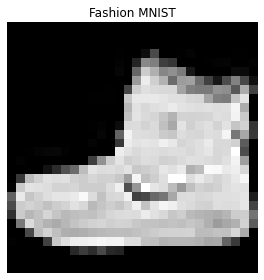

In [ ]:
#-----Viewing Image-----#
imgs = next(iter(train_dataset))
plt.axis('off')
plt.title('Fashion MNIST')
plt.tight_layout()
plt.imshow(imgs[0][0], cmap ='gray')

In [30]:
from torch.utils.data import DataLoader
batch_size = 128 
train_loader = DataLoader(train_dataset,batch_size)
test_loader = DataLoader(test_dataset, batch_size*2)

In [40]:
class Classifier(nn.Module):
  def __init__(self,input_channels,numchannelslayer1, numchannelslayer2,imgheight,imgwidth,fclayer1size,fclayer2size):
    '''input_channels : Number of channels in input images
       numchannelslayer1 : Number of channels after passing through first Convulation layer
       numchannelslayer1 : Number of channels after passing through second Convulation layer
       imgheight : Height of input image 
       imgwidth  : Width of input image 
       fclayer1size : Layer size of the first fully connected layer
       fclayer2size : Layer size of the second fully connected layer'''

    super().__init__()
    self.input_channels = input_channels
    self.numchannelslayer1 = numchannelslayer1
    self.numchannelslayer2 = numchannelslayer2
    self.height = imgheight
    self.width  = imgwidth
    self.fclayer1size = fclayer1size
    self.fclayer2size = fclayer2size

    self.conv1 = nn.Conv2d(self.input_channels,self.numchannelslayer1,kernel_size = 3, padding = 1)
    self.pool1 = nn.MaxPool2d(2)
    self.act1  = nn.ReLU()

    self.conv2 = nn.Conv2d(self.numchannelslayer1, self.numchannelslayer2, kernel_size = 3, padding = 1)
    self.pool2 = nn.MaxPool2d(2)
    self.act2  = nn.ReLU()
     
    self.height1 = int(self.height/4)
    self.width1 = int(self.width/4)

    self.fc1   = nn.Linear(self.numchannelslayer2*self.height1*self.width1,self.fclayer1size)
    self.act3  = nn.ReLU()

    self.fc2   = nn.Linear(self.fclayer1size, self.fclayer2size)
    self.act4  = nn.Tanh()

  def forward(self,x):
    out = self.act1(self.pool1(self.conv1(x)))
    out = self.act2(self.pool2(self.conv2(out)))
    out = out.view(-1,self.numchannelslayer2*self.height1*self.width1)
    out = self.act3(self.fc1(out))
    out = self.act4(self.fc2(out))
    return out

  def CorrectPredictions(self,out,y):
    labels = torch.argmax(out,axis = 1)
    correct = (labels == y).sum()
    return correct

In [49]:
model = Classifier(input_channels = 1 ,numchannelslayer1 = 16, numchannelslayer2 = 32,imgheight = 28,imgwidth = 28,fclayer1size = 256,fclayer2size = 10)
model.to('cuda')

Classifier(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act1): ReLU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (act2): ReLU()
  (fc1): Linear(in_features=1568, out_features=256, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (act4): Tanh()
)

In [55]:
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr = 1e-1)

In [56]:
num_epochs = 50
iters = [i for i in range(num_epochs)]
lossperepoch = []
model.train()
for epochs in range(1,num_epochs+1):
  loss_total = 0.0
  correct_total = 0
  for imgs,labels in train_loader:
    imgs,labels = imgs.to('cuda'),labels.to('cuda')
    outputs = model(imgs)

    loss = loss_fn(outputs,labels)

    loss.backward()

    opt.step()
    opt.zero_grad()

    loss_total += loss

    correct = model.CorrectPredictions(outputs,labels)
    correct_total += correct

  lossperepoch.append(loss_total)

  print("[{}/{}] Accuracy: {}%".format(epochs,num_epochs,float(correct_total/len(train_dataset)*100)))

[1/50] Accuracy: 84.01333618164062%
[2/50] Accuracy: 87.961669921875%
[3/50] Accuracy: 88.64167022705078%
[4/50] Accuracy: 89.19166564941406%
[5/50] Accuracy: 89.5683364868164%
[6/50] Accuracy: 89.93333435058594%
[7/50] Accuracy: 90.14666748046875%
[8/50] Accuracy: 90.43833923339844%
[9/50] Accuracy: 90.69166564941406%
[10/50] Accuracy: 90.8699951171875%
[11/50] Accuracy: 90.96333312988281%
[12/50] Accuracy: 91.12333679199219%
[13/50] Accuracy: 91.24333190917969%
[14/50] Accuracy: 91.37333679199219%
[15/50] Accuracy: 91.57333374023438%
[16/50] Accuracy: 91.67166900634766%
[17/50] Accuracy: 91.79833221435547%
[18/50] Accuracy: 92.09667205810547%
[19/50] Accuracy: 92.0183334350586%
[20/50] Accuracy: 92.1050033569336%
[21/50] Accuracy: 92.32666778564453%
[22/50] Accuracy: 92.35166931152344%
[23/50] Accuracy: 92.586669921875%
[24/50] Accuracy: 92.63999938964844%
[25/50] Accuracy: 92.8116683959961%
[26/50] Accuracy: 92.76666259765625%
[27/50] Accuracy: 92.86500549316406%
[28/50] Accuracy: 9

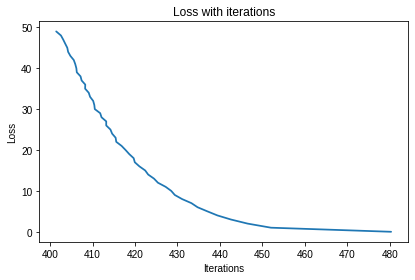

In [57]:
#-----Graph between loss and epochs----#
plt.title('Loss with iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.style.use('seaborn')
plt.tight_layout()
plt.plot(lossperepoch,iters)

In [60]:
model.eval()

#Checking model performance on test set
correct_total_test = 0 
total = 0 

for imgs, labels in test_loader:
  imgs , labels = imgs.to('cuda'),labels.to('cuda')
  test_outputs = model(imgs)
  correct_test = (torch.argmax(test_outputs, axis = 1) == labels).sum()
  correct_total_test += correct_test
  total += labels.shape[0]
print('Accuracy : {}%'.format(float(correct_total_test/total)*100))

Accuracy : 91.09999537467957%


Training set accuaracy : 94.61 %
Test set accuracy : 91.09 %